In [1]:
import pandas as pd

import numpy as np

from scipy import stats
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

par_o = pd.read_csv("/Users/cmdb/Downloads/aau1043_dnm.csv")
p_ag = pd.read_csv("/Users/cmdb/Downloads/aau1043_parental_age.csv")
p_ag
#parental_age


,Proband_id,Father_age,Mother_age
0,675,31,36
1,1097,19,19
2,1230,30,28
3,1481,32,20
4,1806,38,34
...,...,...,...
391,153657,27,23
392,154565,36,30
393,154621,19,18
394,154810,32,28


In [2]:
#total = pd.DataFrame[Proband_id].value_counts()

In [18]:
# Proband_id, pat_dnm, mat_dnm, tot_dnm

#mutations = par_o["Proband_id"].value_counts()

#Prob_id = pd.DataFrame(par_o["Proband_id"].value_counts())
#Prob_mom = pd.DataFrame((par_o["Phase_combined"] == "mother").value_counts())
#Prob_dad = pd.DataFrame((par_o["Phase_combined"] == "father").value_counts())
#Prob_combined = pd.DataFrame(par_o["Phase_combined"].value_counts())



#Prob_id.index.name('Proband_id')
#Prob_id.reset_index()

prob_id = par_o["Proband_id"]
mom = par_o[par_o["Phase_combined"] == "mother"]
dad = par_o[par_o["Phase_combined"] == "father"]
combined = par_o["Phase_combined"]

Prob_mom = mom["Proband_id"].value_counts().rename_axis("Proband_id").reset_index(name= "Mother_Mutations")
Prob_dad = dad["Proband_id"].value_counts().rename_axis("Proband_id").reset_index(name= "Father_Mutations")

FF= pd.merge(Prob_mom, Prob_dad, on="Proband_id")

MUT = pd.merge(p_ag, FF, on="Proband_id")
#prob_id['Prob_id'] = Prob_id

MUT



     Proband_id  Father_age  Mother_age  Mother_Mutations  Father_Mutations
213       91410          51          34                10               111


,Proband_id,Father_age,Mother_age,Mother_Mutations,Father_Mutations
0,675,31,36,19,51
1,1097,19,19,12,26
2,1230,30,28,12,42
3,1481,32,20,14,53
4,1806,38,34,11,61
...,...,...,...,...,...
391,153657,27,23,8,41
392,154565,36,30,14,61
393,154621,19,18,11,39
394,154810,32,28,14,55


# Question 5

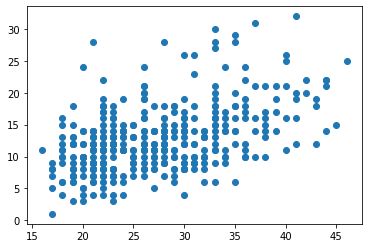

In [4]:
fig,ax = plt.subplots()
ax.scatter(MUT["Mother_age"], MUT["Mother_Mutations"])
plt.show()

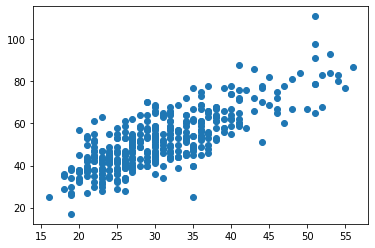

In [5]:
fig,ax = plt.subplots()
ax.scatter(MUT["Father_age"], MUT["Father_Mutations"])
plt.show()

# Question 6

In [17]:
model = smf.ols(formula="Mother_Mutations ~ Mother_age", data = MUT)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mother_Mutations   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        19:46:15   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### a. yes, the relationship is significant because the p values is less than 0.00
#### b. the correlation coefficient is 0.6

# Question 7

In [19]:
model1 = smf.ols(formula="Father_age ~ Father_Mutations", data = MUT)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Father_age   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        19:50:32   Log-Likelihood:                -1191.6
No. Observations:                 396   AIC:                             2387.
Df Residuals:                     394   BIC:                             2395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.0178      0.972      7.220      0.000       5.107       8.929
Father_Mutations     0.4571      0.018     25.291      0.000       0.422       0.493
==============================================================================
Omnibus:                        3.967   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                3.721
Skew:                           0.226   Prob(JB):                        0.156
Kurtosis:                       3.146   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### a. yes, the relationship is significant because the p values is less than 0.00
#### b. the correlation coefficient is 0.46

# Question 8

In [8]:
Mother_bins = int((max(MUT["Mother_Mutations"])-min(MUT["Mother_Mutations"]))/3)
Father_bins = int((max(MUT["Father_Mutations"])-min(MUT["Father_Mutations"]))/3)

print(max(MUT["Mother_Mutations"])-min(MUT["Mother_Mutations"]))
print(max(MUT["Father_Mutations"])-min(MUT["Father_Mutations"]))

31
94


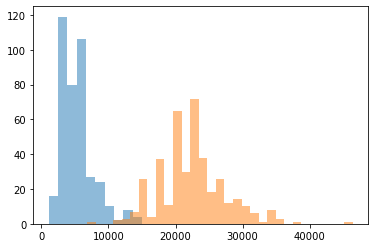

In [9]:
fig,ax = plt.subplots()
ax.hist(MUT["Proband_id"][MUT["Mother_Mutations"]], bins =Mother_bins, alpha =0.5)
ax.hist(MUT["Proband_id"][MUT["Father_Mutations"]], bins =Father_bins, alpha = 0.5)
plt.show()

# Question 9

In [10]:
stats.ttest_ind(MUT["Proband_id"][MUT["Mother_Mutations"]], MUT["Proband_id"][MUT["Father_Mutations"]])

Ttest_indResult(statistic=-63.904595461743035, pvalue=2.219919015e-314)

# Question 10

In [11]:
smf.poisson(formula="Mother_age ~ Mother_Mutations", data = MUT)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Father_age   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        19:42:45   Log-Likelihood:                -1191.6
No. Observations:                 396   AIC:                             2387.
Df Residuals:                     394   BIC:                             2395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.0178      0.972      7.220      0.000       5.107       8.929
Father_Mutations     0.4571      0.018     25.291      0.000       0.422       0.493
==============================================================================
Omnibus:                        3.967   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                3.721
Skew:                           0.226   Prob(JB):                        0.156
Kurtosis:                       3.146   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model = smf.poisson(formula="Mother_age ~ Mother_Mutations", data = MUT)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 3.141794
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:             Mother_age   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Thu, 10 Sep 2020   Pseudo R-squ.:                 0.05120
Time:                        19:51:06   Log-Likelihood:                -1244.2
converged:                       True   LL-Null:                       -1311.3
Covariance Type:            nonrobust   LLR p-value:                 4.765e-31
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.0289      0.026    117.716      0.000       2.978       3.079
Mother_Mutations     0.0210      0.002     11.785      0.000       0.018       0.025
====================================================================================
"""

In [21]:
model = smf.poisson(formula="Father_Mutations ~ 1 + Father_age", data = MUT)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:       Father_Mutations   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Thu, 10 Sep 2020   Pseudo R-squ.:                  0.2277
Time:                        19:51:29   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

In [23]:
model = smf.poisson(formula="Father_Mutations ~ Father_age", data = MUT)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:       Father_Mutations   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Thu, 10 Sep 2020   Pseudo R-squ.:                  0.2277
Time:                        19:52:21   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

In [24]:
model = smf.poisson(formula="Mother_Mutations ~ Father_Mutations", data = MUT)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 3.011762
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:       Mother_Mutations   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Thu, 10 Sep 2020   Pseudo R-squ.:                 0.04507
Time:                        19:52:29   Log-Likelihood:                -1192.7
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 2.662e-26
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.9885      0.055     36.355      0.000       1.881       2.096
Father_Mutations     0.0105      0.001     10.793      0.000       0.009       0.012
====================================================================================
"""

# Question 11

In [25]:
# P(m)= (e^-lamda(50.5))*((lamda(50.5))^m)/m! 
#u = exp(a+Bx)
import math 

math.exp(3.19 + 50.5*0.024)


81.61393341269087

#### 

